JERZY ANDRZEJEWSKI 230347

TASK 1

In [419]:
import skimage
import skimage.io
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt

In [420]:
def mask_generator(img):
    radius = 64
    x_center = int(img.shape[0]/2)
    y_center = int(img.shape[1]/2)
    mask = np.zeros((img.shape[0], img.shape[1]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            sqr = np.square(x - x_center) + np.square(y-y_center)
            if sqr < radius**2:
                mask[x, y] = 1 - np.sqrt(sqr) / radius
    return mask

In [421]:
img = skimage.data.camera()
img_fft = np.fft.fft2(img)
img_fft_shift = np.fft.fftshift(np.fft.fft2(img))
img_abs = 20 * np.log(np.abs(img_fft_shift))
mask = mask_generator(img_fft_shift)
shifted_transform = np.fft.ifftshift(mask * img_fft_shift)
final = np.fft.ifft2(shifted_transform)


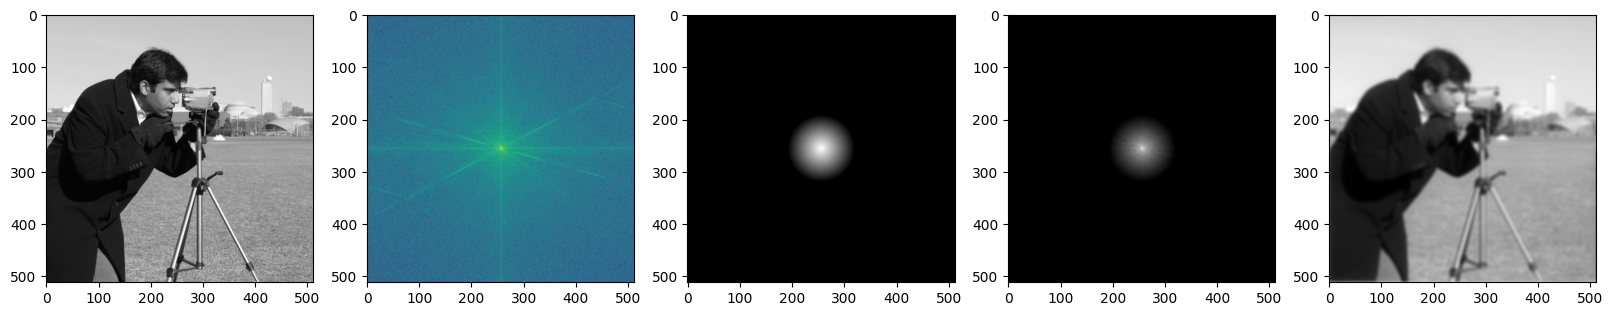

In [422]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figwidth(20)
fig.set_figheight(4)
ax1.imshow(img, cmap = 'gray')
ax2.imshow(img_abs)
ax3.imshow(mask, cmap = 'gray')
ax4.imshow(mask*img_abs, cmap = 'gray')
ax5.imshow(np.abs(final), cmap = 'gray')
plt.show()

In [423]:
def mask_generator1(img):
    small_radius = 8
    big_radius = 64
    x_center = int(img.shape[0]/2)
    y_center = int(img.shape[1]/2)
    mask = np.zeros((img.shape[0], img.shape[1]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            sqr = np.square(x - x_center) + np.square(y-y_center)
            if sqr < big_radius**2 and sqr > small_radius**2:
                mask[x, y] = 1
    return mask

img1 = skimage.data.camera()
img_fft1 = np.fft.fft2(img)
img_fft_shift1 = np.fft.fftshift(np.fft.fft2(img))
img_abs1 = 20 * np.log(np.abs(img_fft_shift1))
mask1 = mask_generator1(img_fft_shift1)
shifted_transform1 = np.fft.ifftshift(mask1 * img_fft_shift1)
final1 = np.fft.ifft2(shifted_transform1)

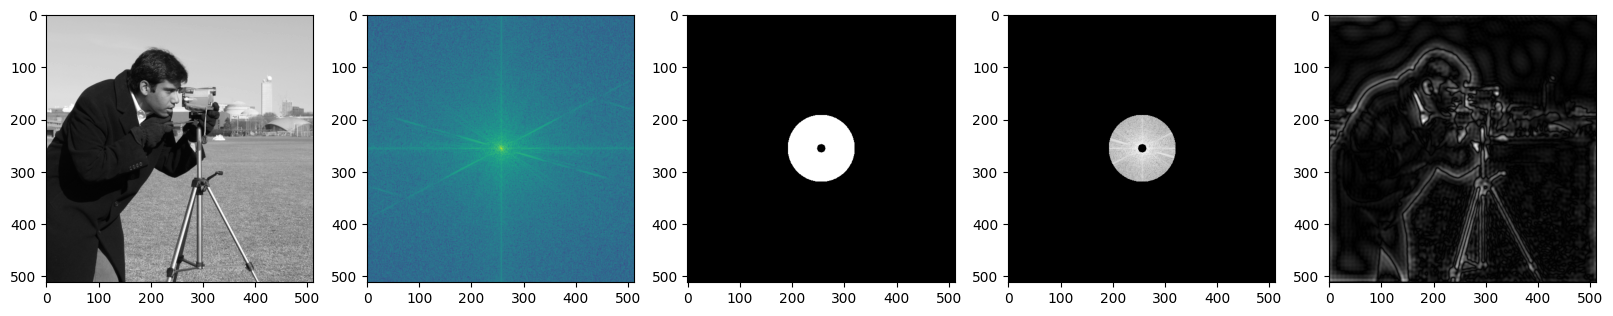

In [424]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figwidth(20)
fig.set_figheight(4)
ax1.imshow(img1, cmap = 'gray')
ax2.imshow(img_abs1)
ax3.imshow(mask1, cmap = 'gray')
ax4.imshow(mask1*img_abs1, cmap = 'gray')
ax5.imshow(np.abs(final1), cmap = 'gray')
plt.show()

In [425]:
def mask_generator2(img):
    radius = 4
    x_center = int(img.shape[0]/2)
    y_center = int(img.shape[1]/2)
    mask = np.ones((img.shape[0], img.shape[1]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            sqr = np.square(x - x_center) + np.square(y-y_center)
            if sqr < radius**2:
                mask[x, y] = 1 + np.sqrt(sqr) / radius
    return mask

img_fft2 = np.fft.fft2(img)
img_fft_shift2 = np.fft.fftshift(np.fft.fft2(img))
img_abs2 = 20 * np.log(np.abs(img_fft_shift2))
mask2 = mask_generator2(img_fft_shift2)
shifted_transform2 = np.fft.ifftshift(mask2 * img_fft_shift2)
final2 = np.fft.ifft2(shifted_transform2)

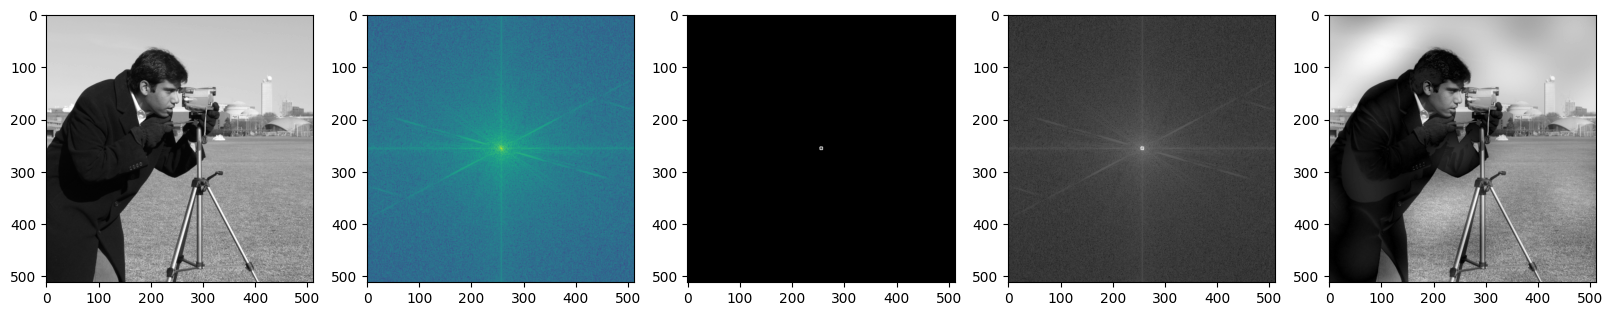

In [426]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figwidth(20)
fig.set_figheight(4)
ax1.imshow(img, cmap = 'gray')
ax2.imshow(img_abs2)
ax3.imshow(mask2, cmap = 'gray')
ax4.imshow(mask2*img_abs2, cmap = 'gray')
ax5.imshow(np.abs(final2), cmap = 'gray')
plt.show()

TASK 2

In [427]:
from skimage.color import rgb2gray

def mask_generator3(img):
    radius = 64
    x_center = int(img.shape[0]/2)
    y_center = int(img.shape[1]/2)
    mask = np.ones((img.shape[0], img.shape[1]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            sqr = np.square(x - x_center) + np.square(y-y_center)
            if sqr < radius**2:
                mask[x, y] = img[x,y]
            else:
                mask[x,y] = 0
    return mask

def func1(img, max_val):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 225:
                img[i,j] = max_val
    return img

gray1 = skimage.io.imread('gray1.jpg')
soldier = rgb2gray(skimage.io.imread('soldier.png'))


In [428]:
gray1_fft = np.fft.fft2(gray1)
gray1_fft_shift = np.fft.fftshift(np.fft.fft2(gray1))
gray1_abs = 20 * np.log(np.abs(gray1_fft_shift))
gray1_abs_copy = func1(gray1_abs, 225)
mask3 = mask_generator3(gray1_abs_copy)
shifted_transform3 = np.fft.ifftshift(mask3 * gray1_fft_shift)
final3 = np.fft.ifft2(shifted_transform3)

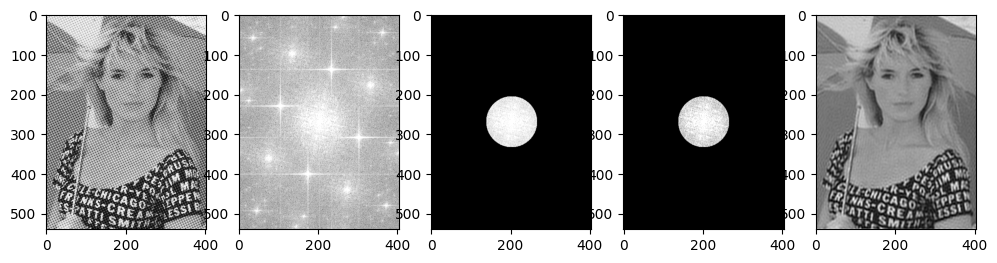

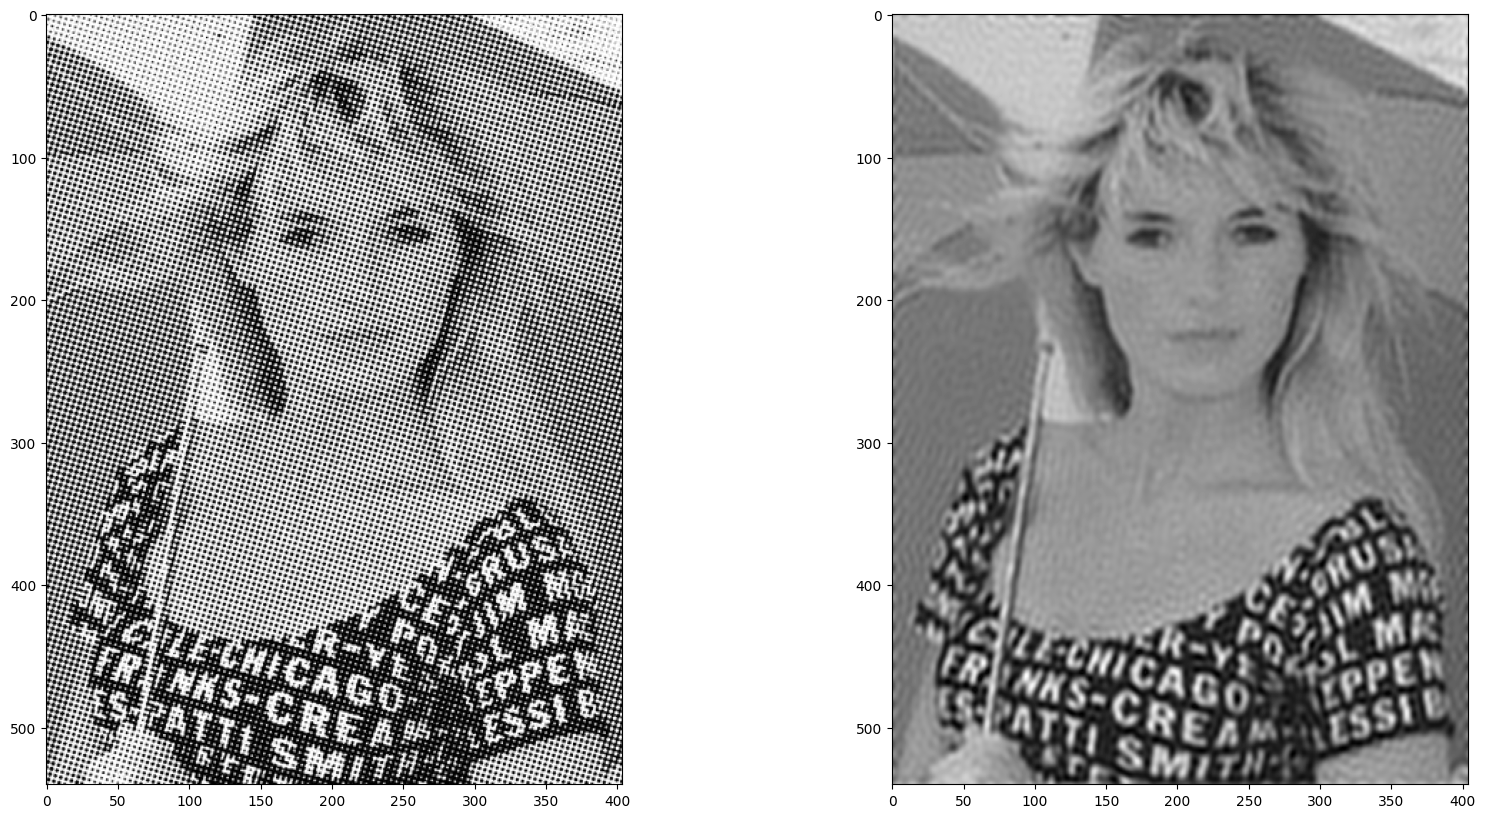

In [429]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figwidth(12)
fig.set_figheight(4)
ax1.imshow(gray1, cmap = 'gray')
ax2.imshow(gray1_abs, cmap = 'gray')
ax3.imshow(mask3, cmap = 'gray')
ax4.imshow(mask3*gray1_abs, cmap = 'gray')
ax5.imshow(np.abs(final3), cmap = 'gray')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax1.imshow(gray1, cmap = 'gray')
ax2.imshow(np.abs(final3), cmap = 'gray')
plt.show()

In [431]:
soldier_fft = np.fft.fft2(soldier)
soldier_fft_shift = np.fft.fftshift(np.fft.fft2(soldier))
soldier_abs = 20 * np.log(np.abs(soldier_fft_shift))
soldier_abs_copy = func1(soldier_abs, 225)
mask4 = mask_generator3(soldier_abs_copy)
shifted_transform4 = np.fft.ifftshift(mask4 * soldier_fft_shift)
final4 = np.fft.ifft2(shifted_transform4)

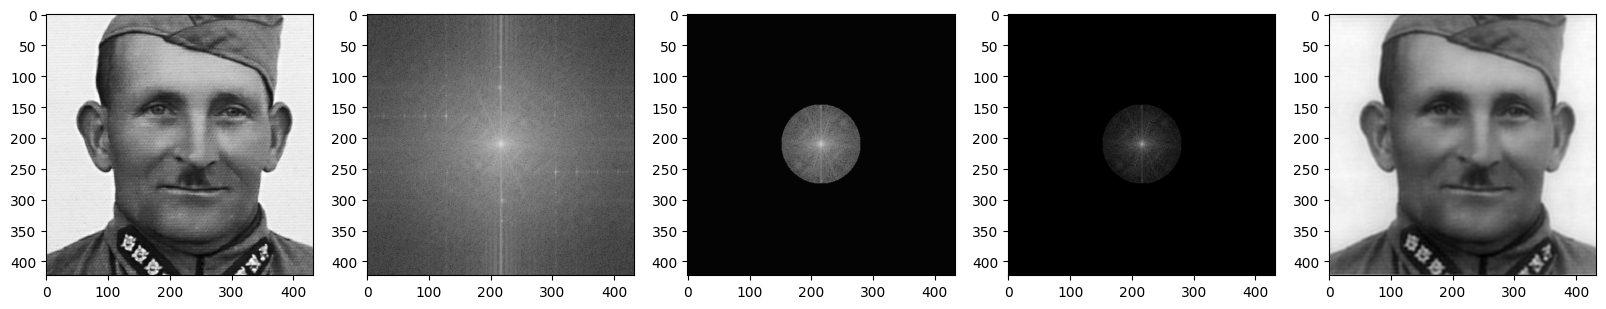

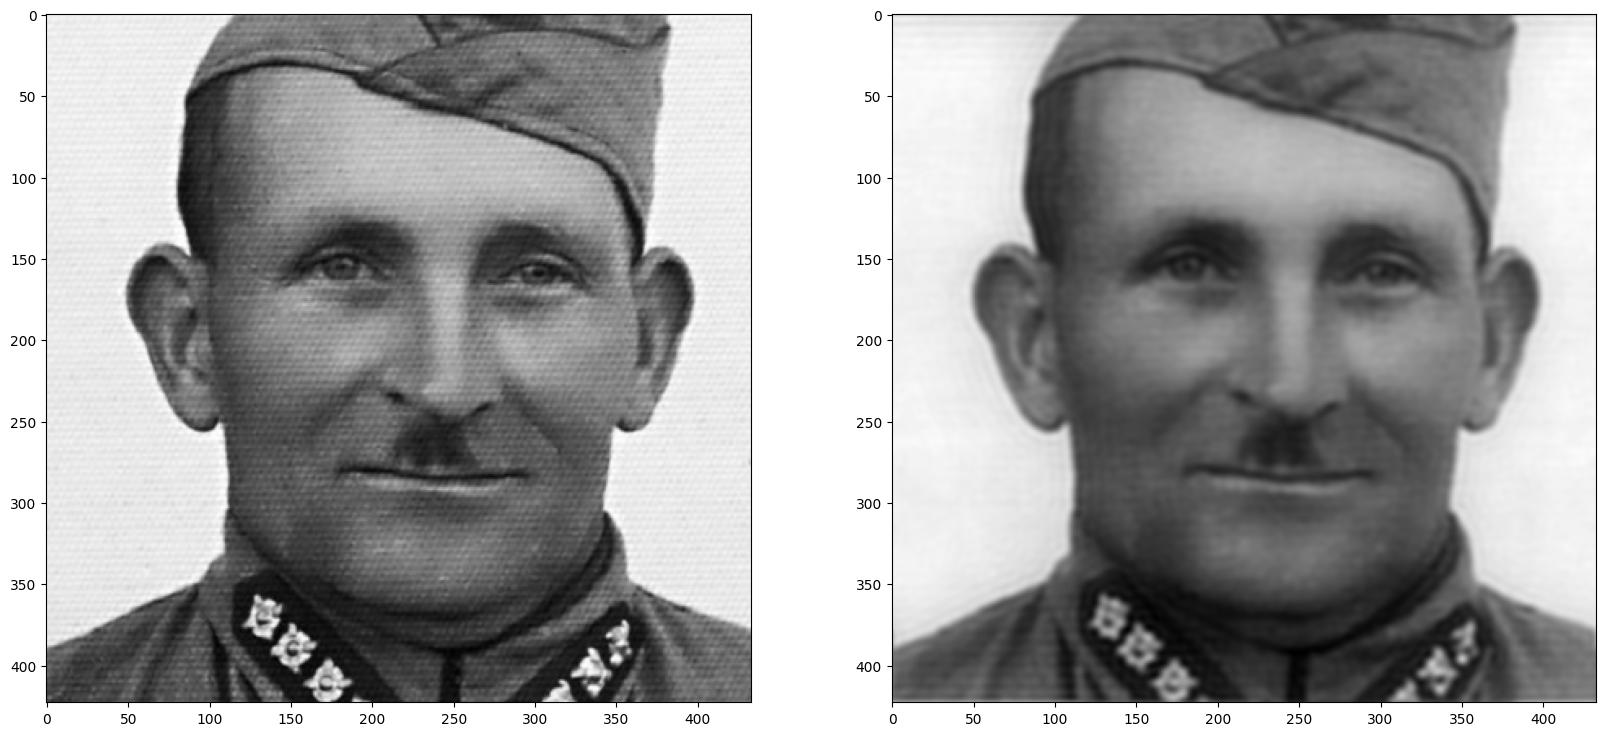

In [432]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figwidth(20)
fig.set_figheight(4)
ax1.imshow(soldier, cmap = 'gray')
ax2.imshow(soldier_abs, cmap = 'gray')
ax3.imshow(mask4, cmap = 'gray')
ax4.imshow(mask4*soldier_abs, cmap = 'gray')
ax5.imshow(np.abs(final4), cmap = 'gray')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax1.imshow(soldier, cmap = 'gray')
ax2.imshow(np.abs(final4), cmap = 'gray')
plt.show()